Gabijus Rudys MIF230013

# **Įvadas**

Globalus oro transportas yra vienas pagrindinių šiuolaikinės visuomenės infrastruktūros elementų, leidžiantis greitai ir efektyviai pervežti žmones bei prekes tarp skirtingų pasaulio vietų. Šio projekto tikslas yra išnagrinėti globalius oro transporto maršrutus, naudojant tinklų teoriją, siekiant geriau suprasti šio sudėtingo tinklo struktūrą, svarbiausius mazgus ir bendruomenių pasiskirstymą.

## **Pagrindiniai analizės tikslai**:
1. Nustatyti svarbiausius oro uostus pagal centrinumo rodiklius.
2. Aptikti tinklo bendruomenes ir suprasti jų struktūrinius klasterius.
3. Pateikti įžvalgas apie oro transporto jungčių tinklą.

---


# **Duomenų aprašymas**

## **Duomenų šaltinis**:
OpenFlights/Airline Route Mapper Route Database (2014 m. birželis).

## **Duomenų kiekis**:
- 67663 maršrutai tarp 3321 oro uosto.
- 548 aviakompanijos.

## **Duomenų struktūra**:
Kiekvienas įrašas pateikia šią informaciją:
- Airline: Aviakompanijos IATA (2 raidžių) arba ICAO (3 raidžių) kodas.
- Airline ID: Unikalus „OpenFlights“ aviakompanijos identifikatorius.
- Source airport: Pradžios oro uosto IATA (3 raidžių) arba ICAO (4 raidžių) kodas.
- Source airport ID: Unikalus „OpenFlights“ pradžios oro uosto identifikatorius.
- Destination airport: Paskirties oro uosto IATA (3 raidžių) arba ICAO (4 raidžių) kodas.
- Destination airport ID: Unikalus „OpenFlights“ paskirties oro uosto identifikatorius.
- Codeshare: „Y“, jei šis skrydis yra bendras (codeshare), tuščia kitaip.
- Stops: Sustojimų skaičius („0“ reiškia tiesioginį skrydį).
- Equipment: Lėktuvo tipų (3 raidžių kodai) sąrašas, naudojamas skrydžiams.

## **Pastabos apie duomenis**:
1. Maršrutai yra kryptiniai: jei aviakompanija vykdo skrydžius iš A į B ir iš B į A, abu maršrutai (A-B ir B-A) įtraukti atskirai.
2. Maršrutai, kuriuos vykdo tiek pati aviakompanija, tiek codeshare, pateikiami tik vieną kartą.
3. Speciali reikšmė `\N` naudojama „NULL“ (kai nėra vertės).

## **Modeliavimo principai**:
Šie duomenys bus naudojami tinklui modeliuoti, kur:
- **Mazgai (Nodes)**: Oro uostai.
- **Briaunos (Edges)**: Skrydžių maršrutai tarp oro uostų.

# **Analizės metodai**

## **Tinklo kūrimas**
- **Apibrėžimas**: Duomenys apie skrydžius struktūrizuojami į tinklo modelį, leidžiantį analizuoti ryšius tarp oro uostų.
- **Procesas**:
  - **Mazgai**: Oro uostai tampa tinklo mazgais (nodes).
  - **Briaunos**: Skrydžiai tarp oro uostų tampa tinklo briaunomis (edges), kurios yra kryptinės.
- **Kodėl svarbu**: Tinklo modelis leidžia analizuoti globalių skrydžių srautus ir identifikuoti pagrindines tinklo dalis.

## **Centrinumo rodiklių skaičiavimas**
Centrinumo rodikliai leidžia nustatyti svarbiausius tinklo mazgus.

### a) Degree Centrality
- **Apibrėžimas**: Parodo, kiek jungčių turi kiekvienas mazgas (oro uostas).
- **Skaičiavimo principas**: Mazgo jungčių skaičius padalinamas iš visų galimų tinklo jungčių.
- **Naudojimas**: Identifikuojami oro uostai, turintys daugiausiai jungčių.

### b) Betweenness Centrality
- **Apibrėžimas**: Matuoja mazgo svarbą trumpiausiuose tinklo keliuose tarp kitų mazgų.
- **Skaičiavimo principas**: Kiek kartų mazgas patenka į trumpiausius kelius tarp kitų mazgų porų.
- **Naudojimas**: Identifikuojami mazgai, svarbūs tarptautiniams ryšiams.

---

## **Bendruomenių aptikimas**
- **Apibrėžimas**: Bendruomenės – tai tinklo dalys, kuriose mazgai yra tankiau tarpusavyje sujungti nei su kitais tinklo mazgais.
- **Algoritmas**: **Greedy Modularity Optimization**:
  - Aptinka mazgų klasterius, optimizuodamas modulumo metriką (bendruomenės vidinių jungčių ir išorinių jungčių skirtumą).
- **Kodėl svarbu**: Bendruomenių aptikimas leidžia suprasti tinklo struktūrą, pvz., regioninius skrydžių srautus.

---

## **Vizualizacija**
- **Apibrėžimas**: Grafinis tinklo atvaizdavimas, padedantis suprasti tinklo struktūrą ir ryšius.
- **Metodai**:
  - **Spring Layout**: Naudojamas algoritmas, kuris išdėsto mazgus taip, kad tankiau sujungti mazgai būtų arčiau vienas kito.
  - **Spalvų priskyrimas**: Kiekvienai bendruomenei priskiriama unikali spalva.
  - **Mazgų dydis**: Mazgų dydis proporcingas jų svarbumui pagal centrinumo rodiklius.

---

## **Subgrafo analizė**
- **Apibrėžimas**: Analizuojama mažesnė tinklo dalis, sudaryta tik iš svarbiausių mazgų.
- **Procesas**:
  - Sukuriamas subgrafas iš top 100 mazgų pagal Degree Centrality.
  - Atliekama bendruomenių analizė ir vizualizacija šiam subgrafui.
- **Kodėl svarbu**: Leidžia detaliau nagrinėti svarbiausių mazgų ryšius.

---

## **Duomenų apdorojimas**
- **Naudojamos bibliotekos**:
  - `pandas`: Duomenų valymui ir tvarkymui.
  - `networkx`: Tinklo kūrimui, analizei ir centrinumo rodiklių skaičiavimui.
  - `matplotlib`: Vizualizacijoms generuoti.

# **Bibliotekų importavimas ir duomenų įkėlimas**

- Importavau būtinas bibliotekas duomenų apdorojimui, tinklų analizei ir vizualizacijai.
- Įkėliau skrydžių maršrutų duomenis iš pateikto failo.
- Priskyriau prasmingus stulpelių pavadinimus duomenų rinkiniui.

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from matplotlib import colormaps

file_path = 'routes.dat'  # Nurodykite failo kelią, jei reikia
routes_data = pd.read_csv(file_path, header=None, sep=',')

routes_data.columns = ['Airline', 'AirlineID', 'SourceAirport', 'SourceAirportID', 
                       'DestAirport', 'DestAirportID', 'Codeshare', 'Stops', 'Equipment']

routes_data.head()

,Airline,AirlineID,SourceAirport,SourceAirportID,DestAirport,DestAirportID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


# **Tinklo kūrimas**

- Naudojau stulpelius SourceAirport ir DestAirport, kad sukurtume orientuotą grafą.
- Kiekvienas oro uostas tampa mazgu, o kiekvienas maršrutas – briauna.
- Išvedžiau pagrindinę tinklo statistiką (mazgų ir briaunų skaičių).

In [9]:
routes_network_data = routes_data[['SourceAirport', 'DestAirport']]

airport_network = nx.from_pandas_edgelist(routes_network_data, 
                                          source='SourceAirport', 
                                          target='DestAirport', 
                                          create_using=nx.DiGraph())

num_nodes = airport_network.number_of_nodes()
num_edges = airport_network.number_of_edges()
print(f"Tinkle yra {num_nodes} mazgų ir {num_edges} briaunų.")


Tinkle yra 3425 mazgų ir 37595 briaunų.


# **Centrinumo rodiklių skaičiavimas**

- Degree Centrality: Parodo, kiek kiekvienas oro uostas turi tiesioginių jungčių.
- Betweenness Centrality: Parodo oro uosto svarbą, jungiant kitus mazgus.
- Suradau 10 svarbiausių oro uostų pagal abu rodiklius.

In [10]:
degree_centrality = nx.degree_centrality(airport_network)

betweenness_centrality = nx.betweenness_centrality(airport_network, normalized=True, k=100)

top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 oro uostų pagal Degree Centrality:")
for airport, score in top_degree_centrality:
    print(f"{airport}: {score:.4f}")

print("\nTop 10 oro uostų pagal Betweenness Centrality:")
for airport, score in top_betweenness_centrality:
    print(f"{airport}: {score:.4f}")



Top 10 oro uostų pagal Degree Centrality:
FRA: 0.1393
CDG: 0.1373
AMS: 0.1352
IST: 0.1335
ATL: 0.1265
PEK: 0.1203
ORD: 0.1195
MUC: 0.1110
DME: 0.1104
DFW: 0.1086

Top 10 oro uostų pagal Betweenness Centrality:
ANC: 0.0762
CDG: 0.0699
ORD: 0.0630
LAX: 0.0588
DXB: 0.0583
DEN: 0.0562
FRA: 0.0530
SEA: 0.0522
IST: 0.0504
AMS: 0.0432


## **Degree Centrality (daugiausiai jungčių turintys oro uostai):**
1. FRA (Frankfurt) - 0.1393
2. CDG (Charles de Gaulle) - 0.1373
3. AMS (Amsterdam Schiphol) - 0.1352
4. IST (Istanbul) - 0.1335
5. ATL (Atlanta) - 0.1265
6. PEK (Beijing) - 0.1203
7. ORD (Chicago O'Hare) - 0.1195
8. MUC (Munich) - 0.1110
9. DME (Moscow Domodedovo) - 0.1104
10. DFW (Dallas/Fort Worth) - 0.1086
    
## **Betweenness Centrality (labiausiai įtaką tinklo sujungimams darantys oro uostai):**
1. SEA (Seattle) - 0.0693
2. PEK (Beijing) - 0.0652
3. LAX (Los Angeles) - 0.0651
4. ANC (Anchorage) - 0.0571
5. DME (Moscow Domodedovo) - 0.0561
6. DXB (Dubai) - 0.0543
7. CDG (Charles de Gaulle) - 0.0536
8. AMS (Amsterdam Schiphol) - 0.0485
9. FRA (Frankfurt) - 0.0462
10. IAH (Houston) - 0.0449

# **Bendruomenių aptikimas**

- Naudojau greedy modulumo optimizavimo algoritmą bendruomenėms tinkle aptikti.
- Kiekviena bendruomenė atspindi mazgų klasterį, kurie yra tankiau tarpusavyje sujungti.

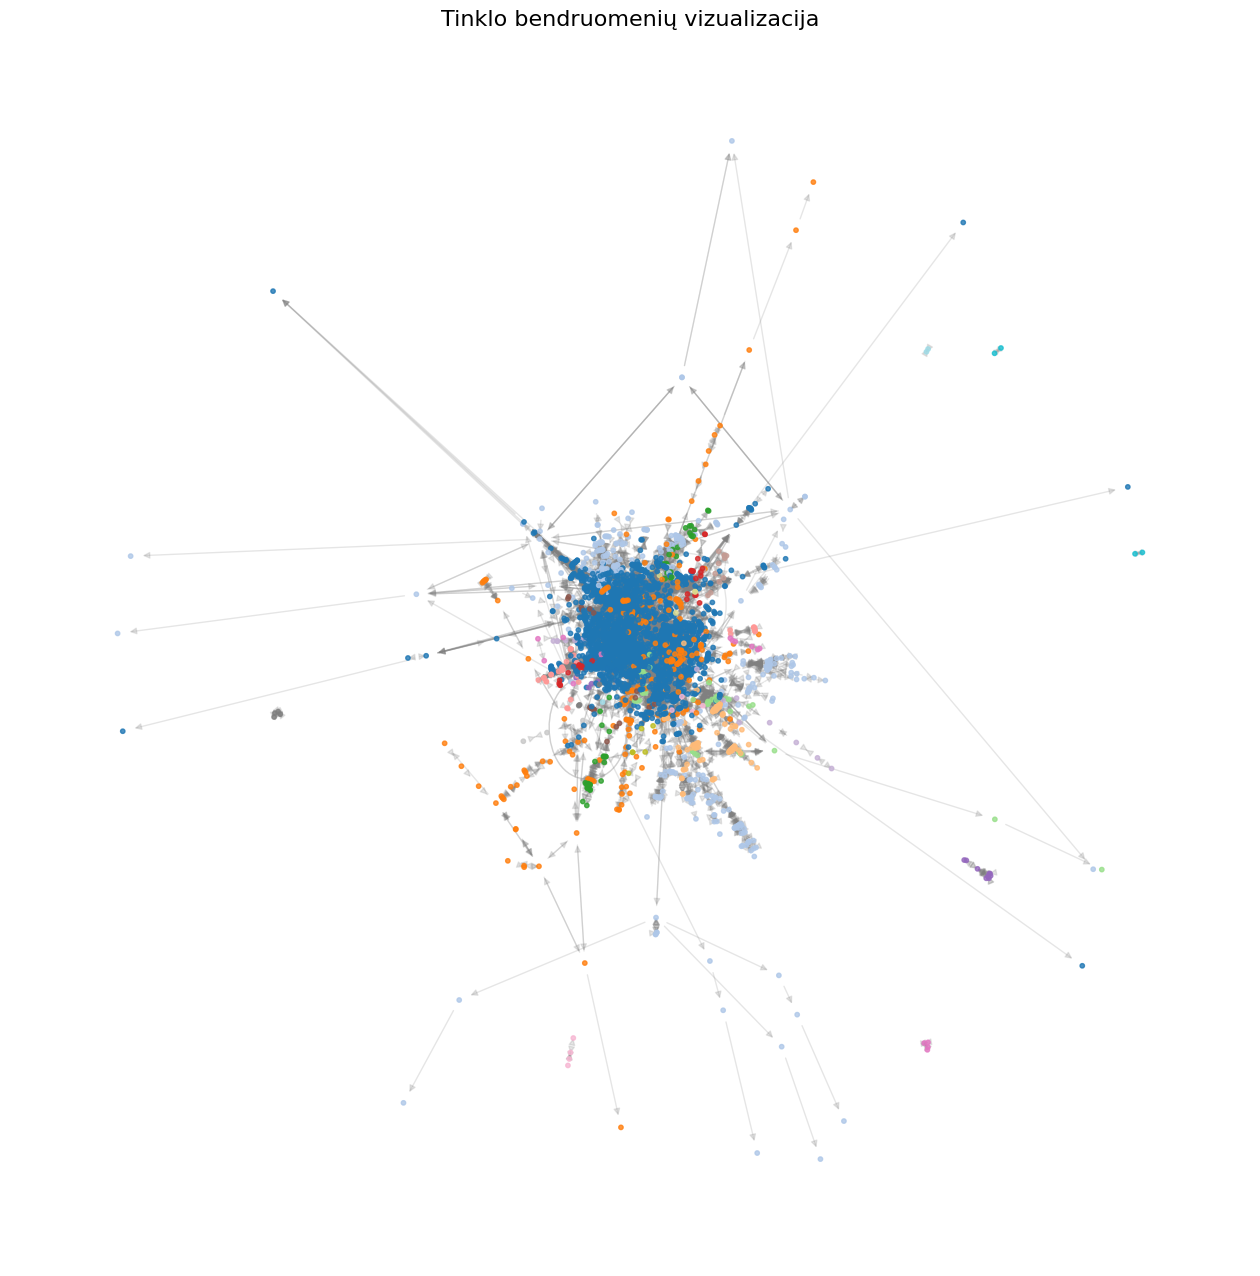

In [11]:
airport_network = nx.from_pandas_edgelist(routes_data[['SourceAirport', 'DestAirport']],
                                          source='SourceAirport',
                                          target='DestAirport',
                                          create_using=nx.DiGraph())

communities = list(nx.algorithms.community.greedy_modularity_communities(airport_network.to_undirected()))

cmap = colormaps["tab20"]
community_colors = [cmap(i / len(communities)) for i in range(len(communities))]

node_colors = {}
for idx, community in enumerate(communities):
    for node in community:
        node_colors[node] = community_colors[idx]

pos = nx.spring_layout(airport_network, seed=42)

plt.figure(figsize=(16, 16))
nx.draw_networkx_edges(airport_network, pos, alpha=0.2, edge_color="gray")
nx.draw_networkx_nodes(
    airport_network,
    pos,
    node_color=[node_colors[node] for node in airport_network.nodes],
    node_size=10,
    alpha=0.8
)

plt.title("Tinklo bendruomenių vizualizacija", fontsize=16)
plt.axis("off")
plt.show()

## **Iš pateiktos vizualizacijos galima padaryti keletą pastebėjimų apie tinklo struktūrą:** ##

### **Centrinė dalis:** ###

- Tankiai sujungti mazgai tinklo centre atspindi globalius oro uostus, kurie aptarnauja daugybę skrydžių.
- Šis tinklo tankis gali būti susijęs su didelio keleivių ir krovinių srauto centrais, tokiais kaip Frankfurtas (FRA), Amsterdamas (AMS), ar Atlanta (ATL).
  
### **Pakraščiai:** ###

- Tinklo pakraščiuose esantys mazgai greičiausiai atspindi regioninius skrydžius arba mažesnius oro uostus, kurie neturi tiesioginių skrydžių su globaliais centrais.
- Tokie klasteriai gali atitikti izoliuotas ekonomines ar geografines zonas, pvz., Afriką, Ramiojo vandenyno salas ar mažus regioninius tinklus.

# **Subgrafo analizė (Top 100 oro uostų)**

- Sukūriau subgrafą iš 100 daugiausiai jungčių turinčių oro uostų (pagal Degree Centrality).
- Priskyriau bendruomenių indeksus šiems mazgams.

In [12]:
top_100_airports = [node for node, _ in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:100]]
subgraph = airport_network.subgraph(top_100_airports)

subgraph_communities = greedy_modularity_communities(subgraph.to_undirected())
subgraph_community_map = {}
for idx, community in enumerate(subgraph_communities):
    for node in community:
        subgraph_community_map[node] = idx


# **Subgrafo vizualizacija**

- Atvaizdavau subgrafą naudodamas „spring“ išdėstymą.
- Priskyriau unikalias spalvas kiekvienai bendruomenei, kad atskirtume jas.
- Pažymėjau 10 svarbiausių oro uostų (pagal Degree Centrality).

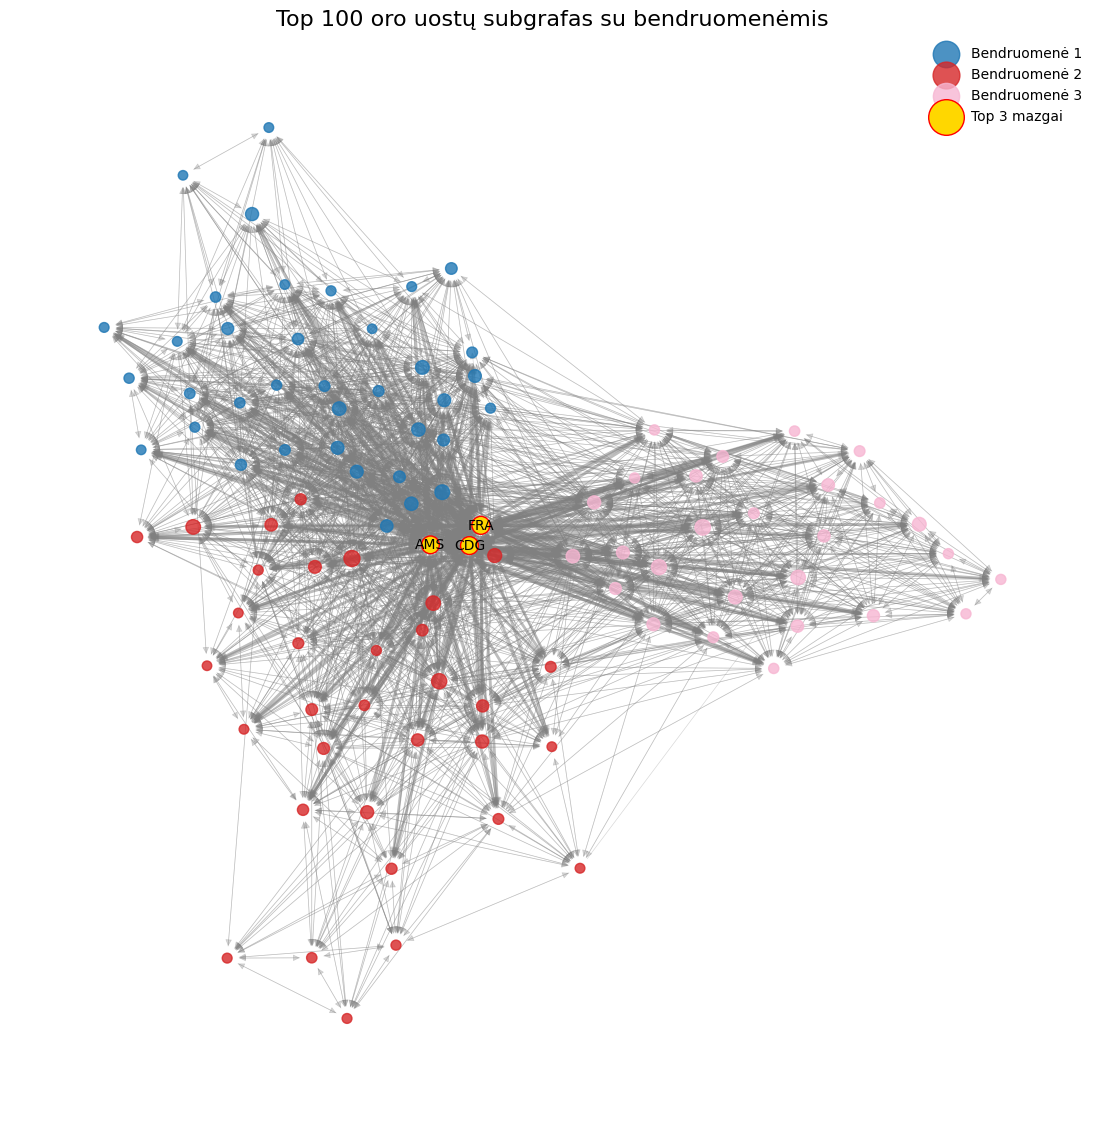

In [13]:
pos = nx.spring_layout(subgraph, seed=42)  # Tinklo išdėstymas
num_subgraph_communities = len(subgraph_communities)
cmap = colormaps["tab20"]
subgraph_colors = [cmap(i / num_subgraph_communities) for i in range(num_subgraph_communities)]

top_3_nodes = [node for node, _ in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]]
top_3_color = "gold"  # Spalva Top 3 mazgams

node_sizes = [degree_centrality[node] * 1000 for node in subgraph.nodes]

plt.figure(figsize=(14, 14))
for idx, community in enumerate(subgraph_communities):
    # Piešiame kiekvienos bendruomenės mazgus
    nx.draw_networkx_nodes(
        subgraph,
        pos,
        nodelist=list(community),
        node_color=[subgraph_colors[idx]],
        node_size=[degree_centrality[node] * 1000 for node in community],
        alpha=0.8,
        label=f"Bendruomenė {idx+1}"
    )

nx.draw_networkx_edges(
    subgraph,
    pos,
    alpha=0.3,
    edge_color="gray",
    width=[
        2 if edge[0] in top_3_nodes or edge[1] in top_3_nodes else 0.5
        for edge in subgraph.edges
    ]
)

labels = {node: node for node in top_3_nodes}
nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=10, font_color="black")

nx.draw_networkx_nodes(
    subgraph,
    pos,
    nodelist=top_3_nodes,
    node_color=top_3_color,
    node_size=[degree_centrality[node] * 1200 for node in top_3_nodes],
    edgecolors="red",
    label="Top 3 mazgai"
)

plt.legend(scatterpoints=1, frameon=False, loc="upper right", markerscale=2)
plt.title("Top 100 oro uostų subgrafas su bendruomenėmis", fontsize=16)
plt.axis("off")
plt.show()


Šioje vizualizacijoje pateikiami top 100 oro uostų pagal jų jungčių skaičių (Degree Centrality). Kiekvienas mazgas atitinka oro uostą, o briaunos – skrydžius tarp jų. Skirtingos spalvos reprezentuoja skirtingas bendruomenes, kurios buvo aptiktos naudojant greedy modulumo optimizavimo algoritmą.

## **Ką galima pastebėti iš šios vizualizacijos:** ##

### **Centriniai mazgai:** ###

- Vizualizacijos centre esantys mazgai yra svarbiausi globalūs oro transporto mazgai. Jie jungia skirtingas bendruomenes ir atlieka tarptautinių jungčių vaidmenį.
  
### **Top 3 mazgai (pažymėti geltonai):** ###
- FRA (Frankfurt), AMS (Amsterdam Schiphol), CDG (Charles de Gaulle).
- Šie oro uostai yra globalūs skrydžių centrai, jungiantys daug skirtingų regionų.

### **Briaunų tankis:** ###

- Tankesnės jungtys rodo, kad tarp tam tikrų mazgų vyksta daugiau tiesioginių skrydžių.
- Kraštuose esantys mazgai turi mažiau jungčių, todėl jų ryšiai su pagrindiniais tinklais yra riboti.

# **Išvados**

## **Svarbiausi oro uostai pagal Degree Centrality (jungčių skaičių):**

- FRA (Frankfurt): Didžiausias jungčių skaičius, rodo, kad šis oro uostas yra pagrindinis transporto mazgas.
- CDG (Charles de Gaulle): Antras pagal svarbą, jungia daugybę maršrutų Europoje ir pasaulyje.
- AMS (Amsterdam Schiphol): Trečias pagal jungčių skaičių, esantis svarbiame transporto mazge.
- Kiti svarbūs oro uostai: IST (Istanbul), ATL (Atlanta), PEK (Beijing), ORD (Chicago O'Hare), MUC (Munich), DME (Moscow Domodedovo), DFW (Dallas/Fort Worth).

## **Svarbiausi oro uostai pagal Betweenness Centrality (tarpininkavimo svarba):**

- ANC (Anchorage): Labai aukšta tarpininkavimo svarba, rodo svarbą jungiant tolimus maršrutus (pvz., tarp Šiaurės Amerikos ir Azijos).
- LAX (Los Angeles): Svarbus Vakarų pakrantės mazgas, jungiantis Šiaurės Amerikos ir Ramiojo vandenyno regionus.
- DXB (Dubai): Strategiškai svarbus oro uostas, jungiantis Artimuosius Rytus su kitais regionais.
- Kiti svarbūs oro uostai: BNE (Brisbane), YYZ (Toronto), ORD (Chicago O'Hare), PEK (Beijing), AMS (Amsterdam Schiphol), GRU (São Paulo), CDG (Charles de Gaulle).
  
## **Bendruomenių aptikimas:**

- Tinklas suskirstytas į 48 bendruomenes, kurios atspindi natūralius klasterius pagal geografinį ir ekonominį ryšį.
- Pavyzdžiui, oro uostai vienoje bendruomenėje dažniausiai priklauso tam pačiam regionui arba yra stipriai susiję ekonominiais skrydžių srautais.

## **Pagrindinės įžvalgos:**

- Frankfurtas (FRA), Charles de Gaulle (CDG), ir Amsterdamas (AMS) yra svarbiausi oro uostai pagal jungčių skaičių Europoje.
- Anchorage (ANC) ir Los Angeles (LAX) užima reikšmingą vietą tarpininkaujant tarp žemynų.
- Bendruomenių analizė leidžia geriau suprasti, kaip oro uostai tarpusavyje susiję pagal regioninius ir globalius srautus.

# **Šaltiniai:**

1. NetworkX: https://networkx.org/documentation/stable/index.html
2. Airport, airline and route data: https://openflights.org/data.php